In [114]:
import os
import re
import numpy as np
import scipy.spatial
import scipy.optimize as optm
from matplotlib import pylab as plt

%matplotlib inline

# First exercise

In [115]:
def myf(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [116]:
myrange = (1, 30)

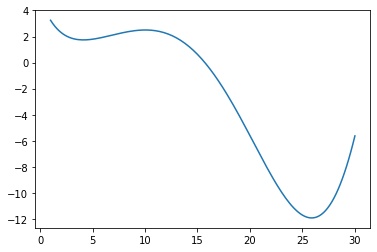

In [117]:
xs = np.append(np.arange(*myrange, 0.2,), 30)
fs = [myf(x) for x in xs]
plt.plot(xs, fs)
plt.show()

## First experiments

In [118]:
min = optm.minimize(myf, (25))
print(str(min))

fun: -11.89889466596626
 hess_inv: array([[1.67418754]])
      jac: array([-4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([25.88018592])


## BFGS

In [119]:
bfgs_answers = []
for initial_point in (2, 30):
    mymin = optm.minimize(myf, (initial_point), method='BFGS')
    print(mymin)
    my_answer = str(round(mymin.fun, 2))
    my_x = str(mymin.x[0].round(2))
    print(f'\nFound min value is {str(my_answer)} at {my_x}\n')
    bfgs_answers.append(my_answer)

fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

Found min value is 1.75 at 4.14

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])

Found min value is -11.9 at 25.88



In [120]:
answer1 = ' '.join(map(str, bfgs_answers))
print(answer1)
with open('solution1.txt', 'w', encoding='utf-8') as fp:
    fp.write(answer1)

1.75 -11.9


## Differential Evolution

In [121]:
mymin = optm.differential_evolution(myf, [myrange])
print(mymin)
de_answer = str(round(mymin.fun[0], 2))
mymin_x = str(mymin.x[0].round(2))
print(f"Global minimum {de_answer} found at {mymin_x}")

fun: array([-11.89889467])
     jac: array([3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019305])
Global minimum -11.9 found at 25.88


In [122]:
answer2 = de_answer
print(de_answer)
with open('solution2.txt', 'w', encoding='utf-8') as fp:
    fp.write(de_answer)

-11.9


## Non-smooth function

In [123]:
def myf_int(x):
    return int(myf(x))

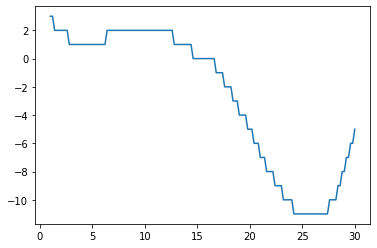

In [124]:
fints = tuple(myf_int(x) for x in xs)
plt.plot(xs, fints)

In [125]:
bfgs_min = optm.minimize(myf_int, (30), method='BFGS')
print(bfgs_min)
bfgs_x = bfgs_min.x[0].round(2)
bfgs_answer = str(round(bfgs_min.fun, 2))
print(f'Found min value is {bfgs_answer} at {str(bfgs_x)}')

fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
Found min value is -5 at 30.0


In [126]:
df_mymin = optm.differential_evolution(myf_int, [myrange])
print(df_mymin)
de_answer = str(df_mymin.fun.round(2))
de_x = str(df_mymin.x.round(2))
print(f"Global minimum {de_answer} found at {de_x}")

fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.23621306])
Global minimum -11.0 found at [25.24]


In [127]:
answer3 = ' '.join((bfgs_answer, de_answer))
print(answer3)
with open('solution3.txt', 'w', encoding='utf-8') as fp:
    fp.write(answer3)

-5 -11.0
